## Introduction

### We'll look at the StackOverflow Developer Survey 2022 dataset in this notebook. The dataset comprises replies to StackOverflow's yearly survey.
### The official dataset can be  found at this link -> https://insights.stackoverflow.com/survey

### There are two files
### 1) survey_results_public.csv
### 2) survey_results_schema.csv

### The schema files consists of the questions asked in the survey and the values are stored in the 'survey_results_public' dataset


## Importing all the necessary libraries required for our analysis

In [91]:
import  pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

# from plotly.offline import plot, iplot, init_notebook_mode
# import plotly.graph_objs as go
# init_notebook_mode(connected=True)

from gitly.colab.plot import GitlyPlotter
gitly = GitlyPlotter('github')

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [92]:
import chart_studio.plotly as py

In [93]:
import chart_studio
username='samson.musumuri'
api_key='BtoFFk78dIVkXYFD4A3r'
chart_studio.tools.set_credentials_file(username=username,
                                        api_key=api_key)

In [94]:
# Reading the dataset
df = pd.read_csv("data/survey_results_public.csv")
# Reading the schema
df_schema = pd.read_csv("data/survey_results_schema.csv",index_col="qname")

In [95]:
df.head(10)

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN
5,6,"I am not primarily a developer, but I write co...","Student, full-time",NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN
6,7,I code primarily as a hobby,"Student, part-time",NaN,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Stack Overflow;Video-based Online Courses,NaN,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN
7,8,I am a developer by profession,"Not employed, but looking for work",NaN,NaN,Some college/university study without earning ...,Online Courses or Certification,NaN,Coursera;Udemy,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN
8,9,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",I don’t code outside of work,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",On the job training;Coding Bootcamp,NaN,NaN,6,...,15-30 minutes a day,Over 120 minutes a day,Somewhat long,Innersource initiative;DevOps function;Microse...,Yes,Yes,Yes,Appropriate in length,Easy,49056.0
9,10,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Fully remote,Hobby;Contribute to open-source projects;Boots...,Some college/university study without earning ...,Books / Physical media;Other online resources ...,Technical documentation;Blogs;Written Tutorial...,NaN,37,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN


In [96]:
df_schema

,qid,question,force_resp,type,selector
qname,,,,,
S0,QID16,"<div><span style=""font-size:19px;""><strong>Hel...",False,DB,TB
MetaInfo,QID12,Browser Meta Info,False,Meta,Browser
S1,QID1,"<span style=""font-size:22px; font-family: aria...",False,DB,TB
MainBranch,QID2,Which of the following options best describes ...,True,MC,SAVR
Employment,QID296,Which of the following best describes your cur...,False,MC,MAVR
...,...,...,...,...,...
Frequency_2,QID290,Interacting with people outside of your immedi...,NaN,MC,MAVR
Frequency_3,QID290,Encountering knowledge silos (where one indivi...,NaN,MC,MAVR
TrueFalse_1,QID294,Are you involved in supporting new hires durin...,NaN,MC,MAVR


In [97]:
#Shape of the data
print("There are {} rows and {} columns in our dataset".format(df.shape[0],df.shape[1]))

There are 73268 rows and 79 columns in our dataset


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73268 entries, 0 to 73267
Data columns (total 79 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ResponseId                      73268 non-null  int64  
 1   MainBranch                      73268 non-null  object 
 2   Employment                      71709 non-null  object 
 3   RemoteWork                      58958 non-null  object 
 4   CodingActivities                58899 non-null  object 
 5   EdLevel                         71571 non-null  object 
 6   LearnCode                       71580 non-null  object 
 7   LearnCodeOnline                 50685 non-null  object 
 8   LearnCodeCoursesCert            29389 non-null  object 
 9   YearsCode                       71331 non-null  object 
 10  YearsCodePro                    51833 non-null  object 
 11  DevType                         61302 non-null  object 
 12  OrgSize                         

In [99]:
# Let's look at the Numerical columns
numeric_cols = df.select_dtypes(["int","float"])
numeric_cols

,ResponseId,CompTotal,VCHostingPersonal use,VCHostingProfessional use,WorkExp,ConvertedCompYearly
0,1,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,NaN,NaN,NaN
2,3,32000.0,NaN,NaN,NaN,40205.0
3,4,60000.0,NaN,NaN,NaN,215232.0
4,5,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
73263,73264,60000.0,NaN,NaN,5.0,NaN
73264,73265,107000.0,NaN,NaN,6.0,NaN
73265,73266,NaN,NaN,NaN,42.0,NaN
73266,73267,58500.0,NaN,NaN,NaN,NaN


### Looks like only 6 columns are Numeric in our dataset.

In [100]:
# Let's look at the Categorical columns
categorical_cols = df.select_dtypes("O")
categorical_cols

,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,...,Frequency_3,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase
0,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult
2,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult
3,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy
4,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73263,I am a developer by profession,"Employed, full-time",Fully remote,Freelance/contract work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Blogs;Written Tutorial...,Udemy,8,5,...,Never,30-60 minutes a day,Less than 15 minutes a day,Just right,DevOps function;Microservices;Developer portal...,Yes,Yes,Yes,Too long,Easy
73264,I am a developer by profession,"Employed, full-time",Full in-person,Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,Coursera;Udemy;Udacity,6,5,...,10+ times a week,15-30 minutes a day,60-120 minutes a day,Very long,None of these,No,Yes,Yes,Too long,Easy
73265,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby;School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Programming Games;Stac...,Udemy;Codecademy;Pluralsight;edX,42,33,...,Never,30-60 minutes a day,60-120 minutes a day,Just right,None of these,No,No,No,Appropriate in length,Easy
73266,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;On the job training,NaN,NaN,50,31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy


## And we have 73 columns that are Categorical



# Question: What are the most popular websites for someone to start learning to code online and get certified ?

### Unpivoting 'LearnCodeCoursesCert' column

In [101]:
df[['ResponseId','LearnCodeCoursesCert']]

,ResponseId,LearnCodeCoursesCert
0,1,NaN
1,2,NaN
2,3,NaN
3,4,NaN
4,5,NaN
...,...,...
73263,73264,Udemy
73264,73265,Coursera;Udemy;Udacity
73265,73266,Udemy;Codecademy;Pluralsight;edX
73266,73267,NaN


In [158]:
def split_count(df, column_name):
    '''
    :param df: The DataFrame for which you have the column that needs to be split
    :param col: Input the column that has values separated by ";"
    :return: Will return a DataFrame consisting of two columns one for the split values and other the count of those values in the entire original DataFrame
    '''

    # The column for which you want to split the values
    unsplit_column = df[[column_name]]

    # Droppping all NaN values from the columns
    unsplit_column = unsplit_column.dropna()

    # Split the column by ";"
    unsplit_column = df[column_name].str.split(';', expand=True)

    # Stack all the values in a single column
    unsplit_column = unsplit_column.stack()

    # Reset Index
    unsplit_column = unsplit_column.reset_index()

    # Rename all columns
    unsplit_column.columns = ["Respondent ID", "Order", column_name]

    # Count the occurrences
    unsplit_column = unsplit_column[[column_name, "Respondent ID"]].groupby(by=[column_name])\
        .count().sort_values("Respondent ID", ascending=False)

    return unsplit_column


In [155]:
def top_online_cert_plot(df,col,plot=True):
    '''

    :param df: Dataset consisting of the column.
    :param col: Column that is of object type and its occurrences are calculated
    :param plot: It is a boolean variable if it is set to True then there is a plot displayed else the Dataframe with value counts is returned.
    :return:
    '''
    
    #Applying the splot_count function to split and count the the occurrences of the values
    data = split_count(df,col)
    
    #Resetting the index
    data_df = data.reset_index()
    
    #Renaming the column
    data_df = data_df.rename(columns={"col":"Websites"})
    
    # If plot is set to True you will get a plot of the top occurrences else will return a df of the same data
    if plot:
        plt.rcParams['figure.figsize'] = 12,8
        sns.barplot(data_df,x=col,y="Respondent ID",color="#42c7bd", edgecolor='Black');
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.title("Top Online Certification Sites",fontsize=17)
        plt.xlabel("Websites",fontsize=15)
        plt.ylabel("Respondents",fontsize=15)
        plt.grid(False);
    else:
        return  data_df

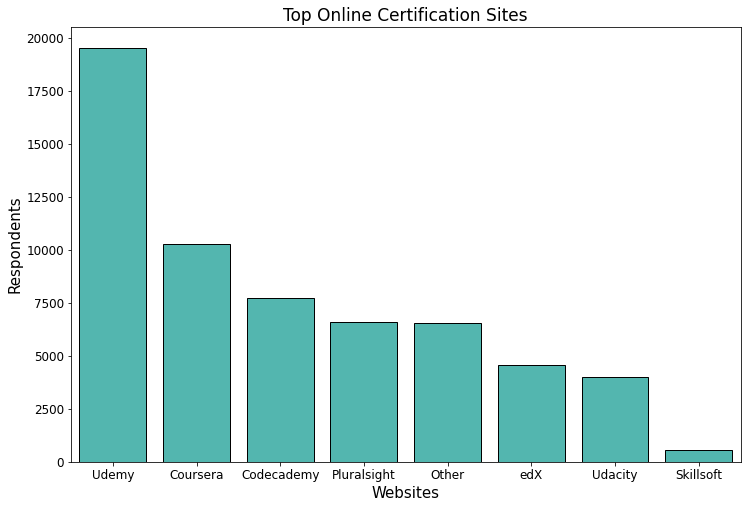

In [156]:
top_online_cert_plot(df,col="LearnCodeCoursesCert",plot=True)

## With votes close to 20,000 'Udemy' stands at the first position followed by 'Coursera'

# Question:  Countries where the respondents are under the age of 18 ?

In [167]:
def age_plot(df,col):
    '''

    :param df:  dataset consisting of the column.
    :param col:  the column fo which you want to create the plot for max counts of those values
    :return:
    '''
    #Extracting only Age and Country columns
    age_df = df[["Age","Country"]]
    
    #Selecting the dataframe based on one particular value
    age_df = df.query("{} == 'Under 18 years old' ".format(col))
    
    #Counting the occurrences of the Country
    plot_age = age_df.groupby("Country").count()
    
    #Plotting the top 10 countries where x-axis is the mean and y-axis are the countries
    plot_age = plot_age[["Age"]].sort_values(by="Age",ascending=True).tail(10)
    (plot_age/plot_age.sum()).plot(kind='barh',legend=None)
    
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.title("Coders Proportion Under the Age of 18",size=17)
    plt.ylabel(None)
    plt.grid(False)

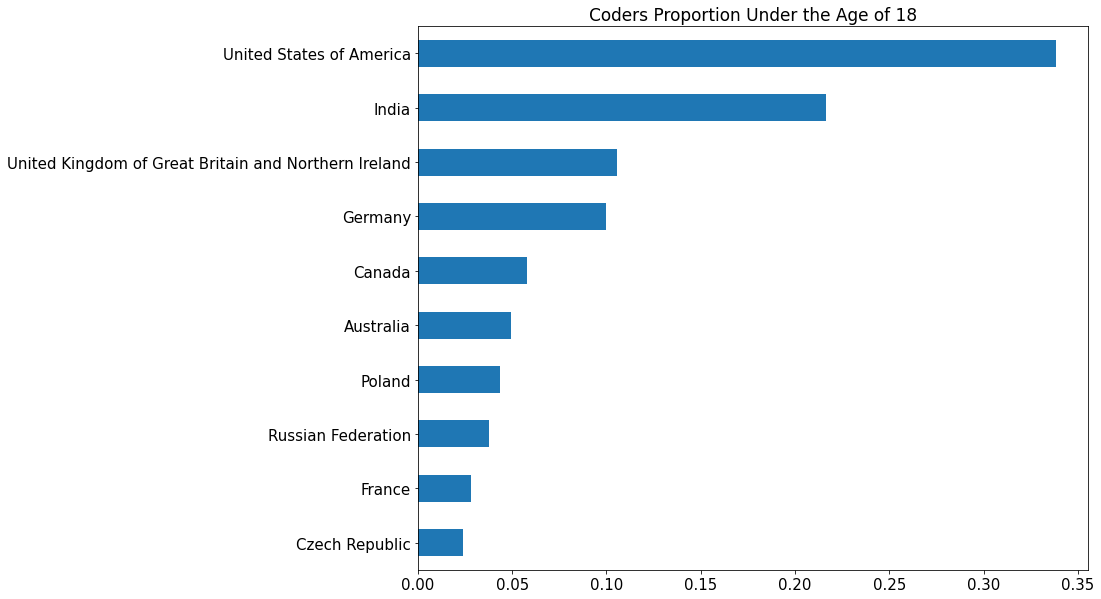

In [168]:
plt.rcParams["figure.figsize"] = 12,10
age_plot(df,"Age")

## Less than 5% of Responders are from countries like France and Czech Republic

# Question: What were the most in-demand developers as of 2022 according to our survey?

In [159]:
dev_type_count = split_count(df,"DevType")
dev_type_count = dev_type_count.reset_index()

In [160]:
fig = px.histogram(
dev_type_count.head(10),
x="DevType",
y="Respondent ID",
barmode="group",
orientation="v",color_discrete_sequence = ['darkcyan']
).update_layout(
title={"text": "Top 10 Developers Types", "x": 0.5}, yaxis_title="Total Votes",xaxis_title="Types")
fig.show()
#gitly.show( fig )
py.plot(fig, filename="top_10_dev_types_stackoverflow_2022_survey", auto_open = True)

'https://plotly.com/~samson.musumuri/3/'

# Question: What does Organization Size looks like in 2022?

In [23]:
data_df = df["OrgSize"].dropna()
data_df = pd.DataFrame(df["OrgSize"].value_counts().sort_values(ascending=True))
data_df.reset_index(inplace=True)
data_df.rename(columns={"index":"Size","OrgSize":"Count"},inplace=True)

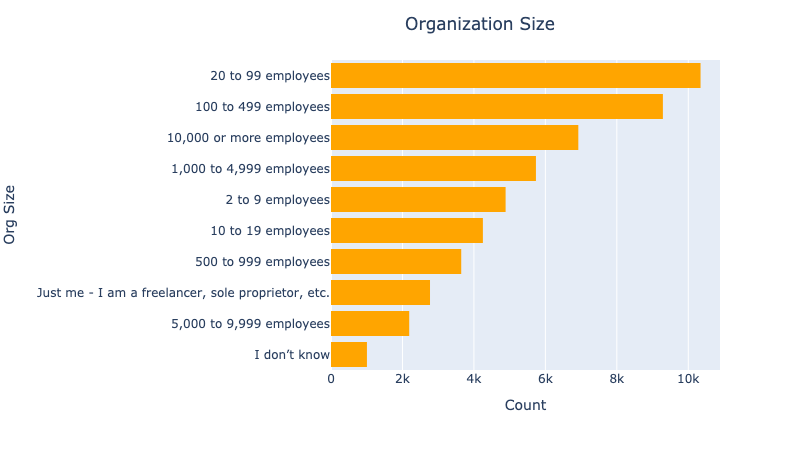

In [24]:
fig = px.histogram(
    data_df,
    x="Count",
    y="Size",
    barmode="group",
    orientation="h",color_discrete_sequence = ['orange']
).update_layout(
    title={"text": "Organization Size", "x": 0.6}, yaxis_title="Org Size",xaxis_title="Count")
#fig.show()
gitly.show(fig)

## Interesting to see that there are more Organizations with  < 100 employees

# Question: Where are these organizations located?

In [187]:
def org_size_country_count(df,column_name,size_value,plot=True):
    '''
    :param df: Dataset where the column exists
    :param col: Column for which you want the count for
    :param size_value: Takes in the string for which you want the value counts for
    :return:
    '''
    #Dataframe that consists of the OrgSize column, Country and its value count
    org_data = df[df[column_name] == size_value]["Country"].value_counts().sort_values(ascending=False)
    
    #Resetting the index
    org_data = org_data.reset_index()
    
    #Renaming the columns
    org_data = org_data.rename(columns={"index":"Country","Country":"Count"})


    # If plot is set to True you will get a plot of the top occurrences of Country else will return a df of the same data
    if plot:
        # Plot For the Organization Size less than 100
        fig = px.pie(org_data.head(10), values='Count', names='Country', title='Top 10 Countries Where Employees are less than 100')
        fig.show()
        gitly.show(fig)
    else:
        return org_data
    

In [188]:
org_size_country_count(df,"OrgSize",size_value="20 to 99 employees")

# Conclusions
•	From our analysis we could infer that about 28% of our responders say that Udemy is the best platform to get certified as coder

•	We see that USA is the leading country to have people coding under the age of 18, according to our data it is 35% of our responders

•	With close to 29,000 responders. It could be inferred that the most popular type of developers are “Full-Stack” Developers

•	Coming to the organization size we see majority of the organizations with less than 100 employees. Which could presumably be startups

•	All these organizations are located in USA
